In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data.

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so it needs a bit of conversion. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride
...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.754520,16.6520,1.31920,1.67755,223.621,0.834410,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.843430,80.2669,1.21137,1.54250,246.185,0.918600,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.000000,0.0000,0.00000,0.00000,0.000,0.000000,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.827140,78.8866,1.35775,1.86002,254.409,0.949290,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.814220,159.4590,1.47188,1.74658,233.780,0.872310,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-20 06:22:49+10:00,07/20/19,06:22:49,2019_07_20_06_22_49.json,204.799,0.764175,140.7350,1.24317,0.00000,222.990,0.832052,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-27 06:12:56+10:00,07/27/19,06:12:56,2019_07_27_06_12_56.json,209.935,0.783340,151.5300,1.28248,1.74567,236.254,0.881543,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-28 06:42:59+10:00,07/28/19,06:42:59,2019_07_28_06_42_59.json,193.017,0.720214,42.8943,1.19066,1.58605,212.345,0.792332,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-28 07:47:24+10:00,07/28/19,07:47:24,2019_07_28_07_47_24.json,251.993,0.940274,74.0446,1.07162,1.74483,268.022,1.000080,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

In [4]:
cheetah.columns

Index(['date', 'time', 'filename', 'axPower', 'aPower Relative Intensity',
       'aBikeScore', 'Skiba aVI', 'aPower Response Index', 'aIsoPower', 'aIF',
       ...
       'Rest AVNN', 'Rest SDNN', 'Rest rMSSD', 'Rest PNN50', 'Rest LF',
       'Rest HF', 'HRV Recovery Points', 'NP', 'IF', 'TSS'],
      dtype='object', length=362)

<h2>check what columns 'cheetah' have</h2>

In [5]:
#just checking the similar data columns that cheetah, strava both have 
new_cheetah=cheetah[['Average Heart Rate','Average Temp','Average Power','Duration','Elevation Gain','Time Moving']]
new_cheetah

,Average Heart Rate,Average Temp,Average Power,Duration,Elevation Gain,Time Moving
2018-01-28 06:39:49+11:00,120.539,21.25070,153.283,1053,77.800,1053
2018-01-28 07:01:32+11:00,146.541,22.72920,186.599,4062,362.200,4062
2018-02-01 08:13:34+11:00,109.629,19.95320,0.000,38977,500.653,6916
2018-02-06 08:06:42+11:00,119.178,19.62430,163.264,4151,355.800,3945
2018-02-07 17:59:05+11:00,124.936,20.51760,148.253,8659,815.400,8159
...,...,...,...,...,...,...
2019-07-20 06:22:49+10:00,0.000,3.49777,164.740,10472,500.400,8229
2019-07-27 06:12:56+10:00,120.261,7.44052,163.695,11150,482.630,8410
2019-07-28 06:42:59+10:00,121.697,3.68468,162.109,2977,157.880,2931
2019-07-28 07:47:24+10:00,144.423,3.74693,235.153,3015,292.200,3015


combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [6]:
everyRide=strava.join(cheetah,on='date',how='inner')
print(everyRide.shape)
everyRide

(243, 372)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
date,,,,,,,,,,,,,,,,,,,,,
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646


<h1>join the two dataframe into one</h1>
<h3>everyRide is the total dataframe of 'strava' and 'cheetha'</h3>
<h3>using join with the 'how==inner' so that they only keep those rows of data that appear in both dataframes</h3>
<h3>rows that appear in both dataframes=243</h3>
<h3>columns = 362(cheetah)+10(strava) = 372</h3>

In [7]:
#Remove the rides with no mearsure power
everyRide=everyRide[everyRide.device_watts==True]
everyRide

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
date,,,,,,,,,,,,,,,,,,,,,
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.793750,147.7970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646


<h2>->Remove the rides with no mearsure power</h2>

5045.7024390243905
3921.0
0.5666425783837038


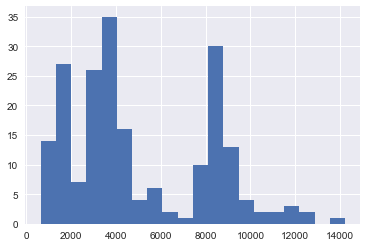

In [8]:
time=everyRide['Time Moving']
time.hist(histtype = 'stepfilled', bins = 20)
print(time.mean())
print(time.median())
print(time.skew())

<h1>*Time's mean, median,skewness, histogram</h1>
<h3>mean is bigger than median and skewness is positive(skewed left: mode  meidan mean)</h3>

35.51951219512195
32.1
0.5132584678230234


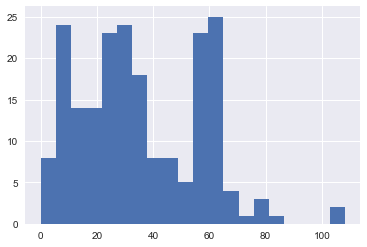

In [10]:
distance=everyRide['distance']
distance.hist(histtype = 'stepfilled', bins = 20)
print(distance.mean())
print(distance.median())
print(distance.skew())

<h1>*distance's mean, median,skewness, histogram</h1>
<h3>mean is bigger than median and skewness is positive</h3>

25.707538048780485
25.1072
0.43621318841282203


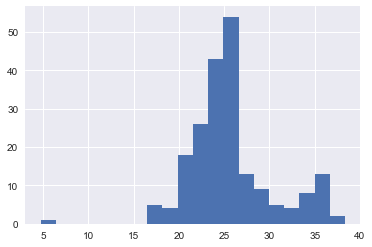

In [11]:
average_speed=everyRide['Average Speed']

average_speed.hist(histtype = 'stepfilled', bins = 20)
print(average_speed.mean())
print(average_speed.median())
print(average_speed.skew())

<h1> *average_speed's mean, median,skewness, histogram</h1>
<h3>mean is bigger than median and skewness is positive</h3>

165.55154634146342
162.109
0.5408197937668116


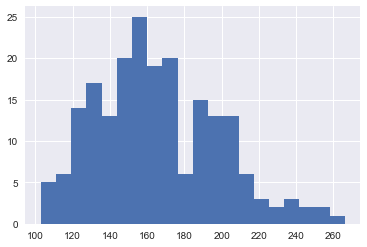

In [12]:
average_power=everyRide['Average Power']
average_power.hist(histtype="stepfilled",bins=20)
print(average_power.mean())
print(average_power.median())
print(average_power.skew())

<h1> *average_power's mean, median,skewness, histogram</h1>
<h3>mean is bigger than median and skewness is positive</h3>

100.5378795121951
82.3568
1.0832346587856845


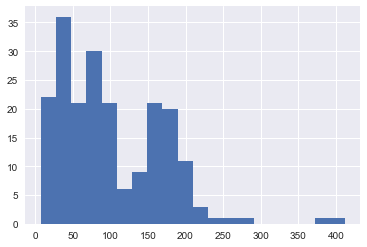

In [13]:
tss=everyRide['TSS']
tss.hist(histtype="stepfilled",bins=20)
print(tss.mean())
print(tss.median())
print(tss.skew())

<h1> *tss's mean, median,skewness, histogram</h1>
<h3>mean is bigger than median and skewness is positive</h3>

In [14]:
new_everyRide=everyRide[['distance','Time Moving','Average Speed','Average Heart Rate','Average Power','NP','TSS','Elevation Gain']]
new_everyRide

,distance,Time Moving,Average Speed,Average Heart Rate,Average Power,NP,TSS,Elevation Gain
date,,,,,,,,
2018-01-27 19:39:49+00:00,7.6,1053,26.0234,120.539,153.283,222.856,20.2257,77.80
2018-01-27 20:01:32+00:00,38.6,4062,34.4380,146.541,186.599,245.365,94.5787,362.20
2018-02-05 21:06:42+00:00,24.3,3945,22.2417,119.178,163.264,253.702,98.3269,355.80
2018-02-07 06:59:05+00:00,47.1,8159,20.7841,124.936,148.253,232.644,171.0780,815.40
2018-02-09 19:18:03+00:00,59.8,8415,25.6585,122.678,143.918,212.726,147.7970,513.20
...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,58.2,8229,25.4524,0.000,164.740,222.988,159.3630,500.40
2019-07-26 20:12:56+00:00,59.6,8410,25.5036,120.261,163.695,236.028,183.1140,482.63
2019-07-27 20:42:59+00:00,19.8,2931,24.3316,121.697,162.109,212.020,51.1646,157.88


<h1>#Creat new data frame to explore the relationship between variables</h2>

In [15]:
new_everyRide.corr()

,distance,Time Moving,Average Speed,Average Heart Rate,Average Power,NP,TSS,Elevation Gain
distance,1.000000,0.971838,0.110461,0.146208,0.030508,0.202935,0.920085,0.804821
Time Moving,0.971838,1.000000,-0.102954,0.084424,-0.119603,0.092725,0.909882,0.828337
Average Speed,0.110461,-0.102954,1.000000,0.366373,0.738740,0.507974,0.037499,-0.078419
Average Heart Rate,0.146208,0.084424,0.366373,1.000000,0.406241,0.271764,0.147901,0.037649
Average Power,0.030508,-0.119603,0.738740,0.406241,1.000000,0.761274,0.139968,-0.113476
NP,0.202935,0.092725,0.507974,0.271764,0.761274,1.000000,0.425102,0.228622
TSS,0.920085,0.909882,0.037499,0.147901,0.139968,0.425102,1.000000,0.830574
Elevation Gain,0.804821,0.828337,-0.078419,0.037649,-0.113476,0.228622,0.830574,1.000000


<h2>they all have positive relation with the others.</h2>
<h2>Time Moving,distance have really high positive correlation (0.919551)</h2>

<h1>#create correlation table</h1>

[Text(0.5, 0, 'distance'),
 Text(1.5, 0, 'Time Moving'),
 Text(2.5, 0, 'Average Speed'),
 Text(3.5, 0, 'Average Heart Rate'),
 Text(4.5, 0, 'Average Power'),
 Text(5.5, 0, 'NP'),
 Text(6.5, 0, 'TSS'),
 Text(7.5, 0, 'Elevation Gain')]

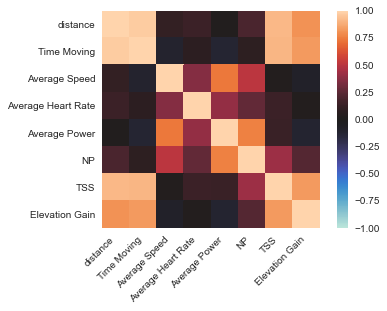

In [16]:
import seaborn as sns
corr=new_everyRide.corr()
ax = sns.heatmap(corr, 
                 vmin = -1,
                 vmax=1,
                 center=0,
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

<h1>#creat heatmap to see what correlationship they have between </h1>

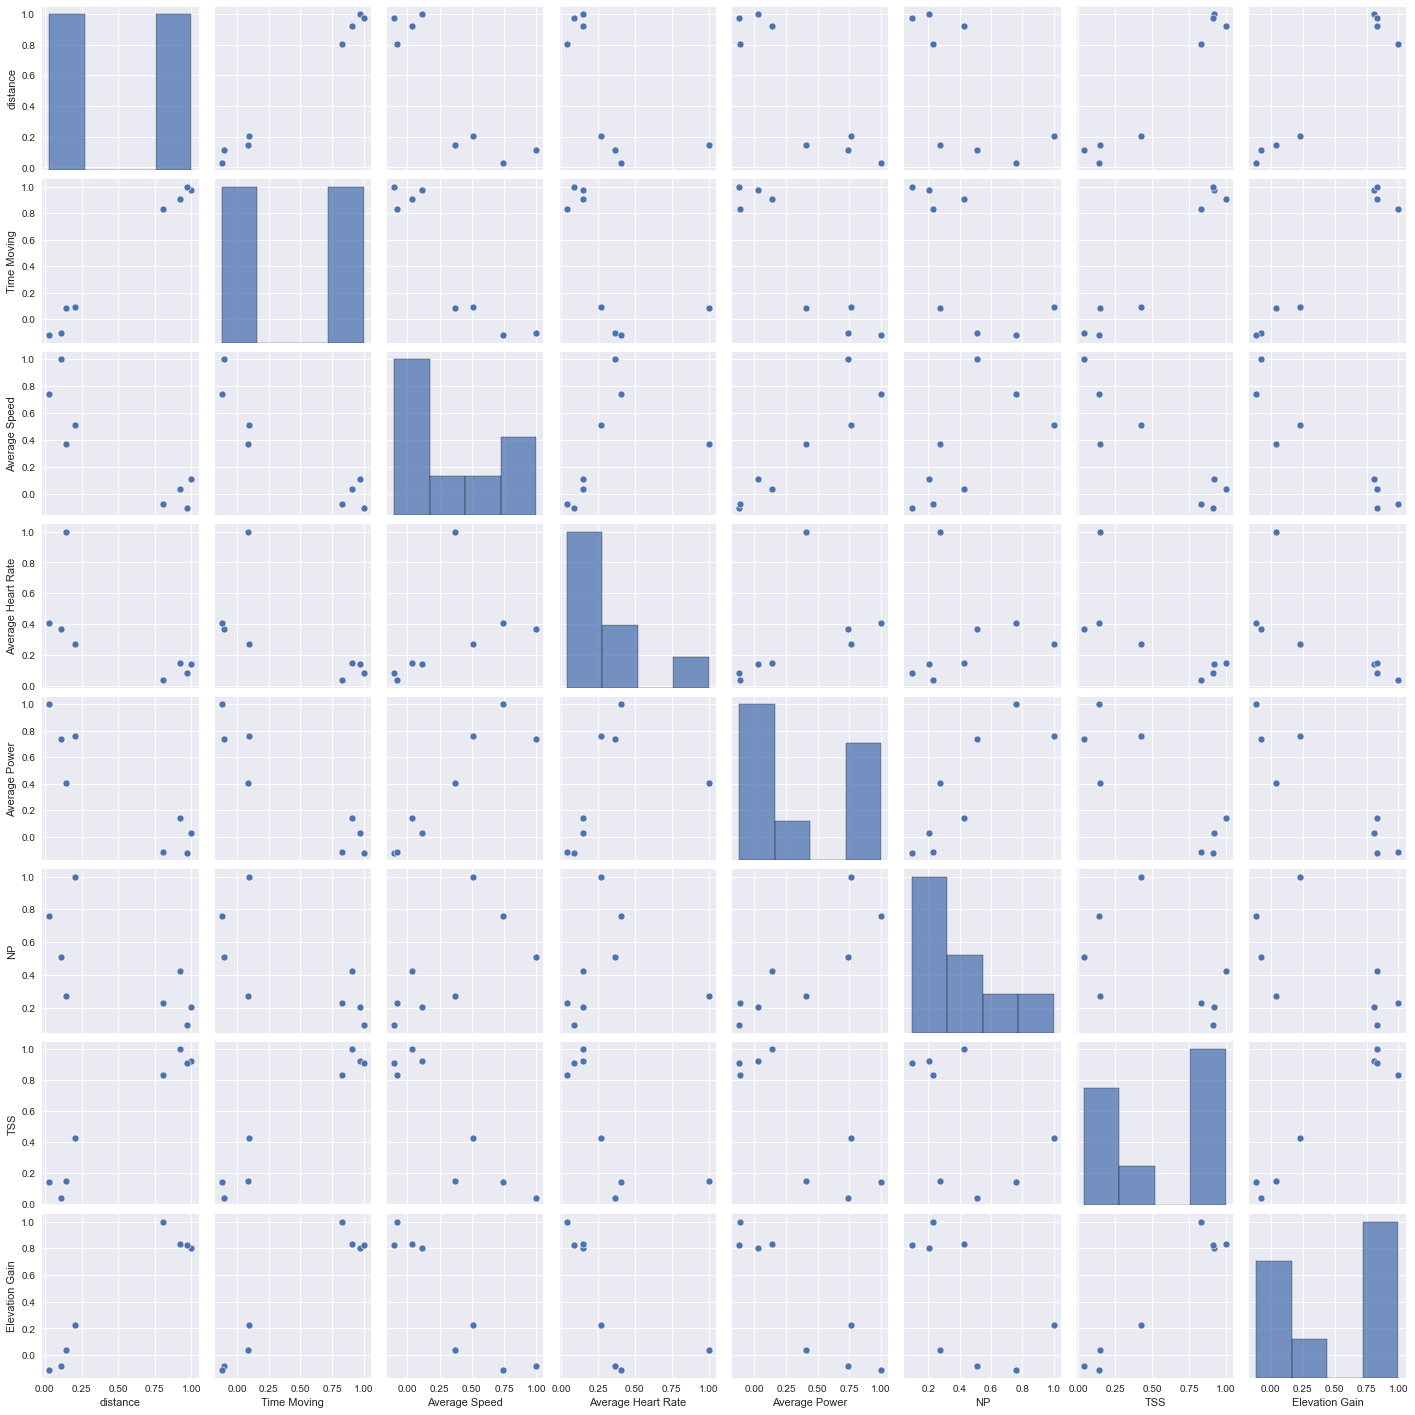

In [17]:
g = sns.pairplot(corr)

<h1>#creat pairplot to see what correlationship they have between </h1>

<h2>conclusion</h2>
<h3>as we can observe from table, heatmap, pairplot, that all of the 8 variables have the positive correlation </h3>

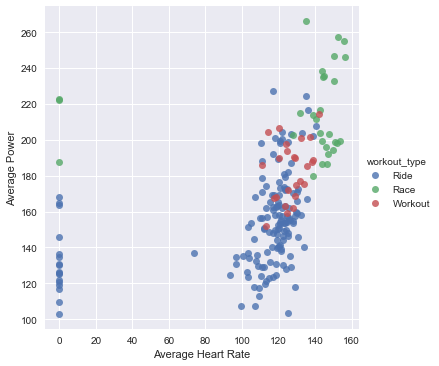

In [18]:
sns.lmplot(x='Average Heart Rate', y='Average Power', data=everyRide, fit_reg=False, hue="workout_type")

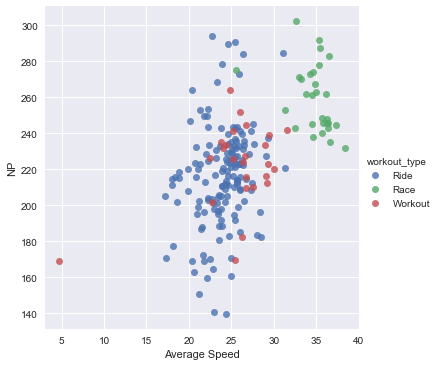

In [19]:
sns.lmplot(x='Average Speed', y='NP', data=everyRide, fit_reg=False, hue="workout_type")

<h1>#using scatter plots</h1>
<h2>these 4 variables are variables that we can find clusters<br>(except outliers)</br></h2>
<h2>Through scatter plots I could find out that they have specific figures and form based on the workout_type </h2>
<h2>Average Power : Ride < Workout <  Race</h2>
<h2>Average Heart Rate : Ride < Workout < Race</h2>
<h2>Average Speed : Ride < Workout < Race</h2>
<h2>NP : Ride < Workout < Race </h2>

<h2>
'Race' recorded the highest number.
'workout' was in the middle, and'ride' was the lowest.</h2>

In [20]:
#make seperated dataframe for Ride, Race, Workout
ride=everyRide[everyRide.workout_type=='Ride']
race=everyRide[everyRide.workout_type=='Race']
workout=everyRide[everyRide.workout_type=='Workout']




<h2>-> make seperated dataframe for Ride, Race, Workout</h2>

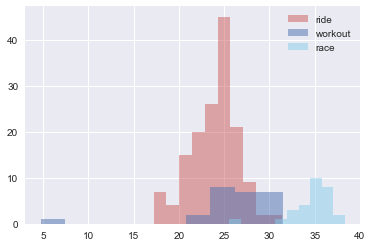

In [21]:
#make histogram to compare 3 new dataframes
plt.hist(ride['Average Speed'], bins=10, alpha=0.5, label='ride',color='indianred')
plt.hist(workout['Average Speed'], bins=10, alpha=0.5, label='workout')
plt.hist(race['Average Speed'], bins=10, alpha=0.5, label='race',color='skyblue')
plt.legend(loc='upper right')
plt.show()

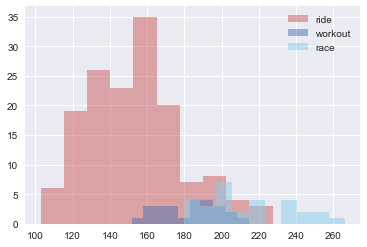

In [22]:
#make histogram to compare 3 new dataframes
plt.hist(ride['Average Power'], bins=10, alpha=0.5, label='ride',color='indianred')
plt.hist(workout['Average Power'], bins=10, alpha=0.5, label='workout')
plt.hist(race['Average Power'], bins=10, alpha=0.5, label='race',color='skyblue')
plt.legend(loc='upper right')
plt.show()

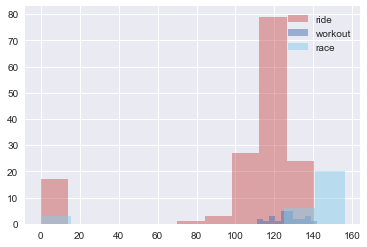

In [23]:
#make histogram to compare 3 new dataframes
plt.hist(ride['Average Heart Rate'], bins=10, alpha=0.5, label='ride',color='indianred')
plt.hist(workout['Average Heart Rate'], bins=10, alpha=0.5, label='workout')
plt.hist(race['Average Heart Rate'], bins=10, alpha=0.5, label='race',color='skyblue')
plt.legend(loc='upper right')
plt.show()

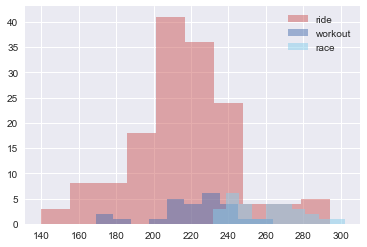

In [24]:
#make histogram to compare 3 new dataframes
plt.hist(ride['NP'], bins=10, alpha=0.5, label='ride',color='indianred')
plt.hist(workout['NP'], bins=10, alpha=0.5, label='workout')
plt.hist(race['NP'], bins=10, alpha=0.5, label='race',color='skyblue')
plt.legend(loc='upper right')
plt.show()

<h1>#make histogram to compare 3 new dataframes </h1>
<h2>from the four different histogram('Average speed','Average Power', 'Average Heart Rate' , 'NP') we can find out the same result from the scatterplot</h2>

<AxesSubplot:>

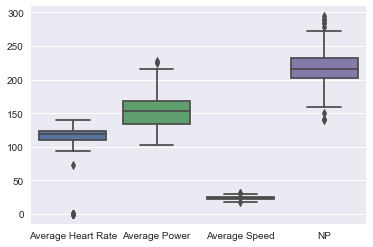

In [25]:
#make boxplot to compare 3 new dataframes
stats_ride = ride[['Average Heart Rate','Average Power','Average Speed','NP']]
 
sns.boxplot(data=stats_ride)

<AxesSubplot:>

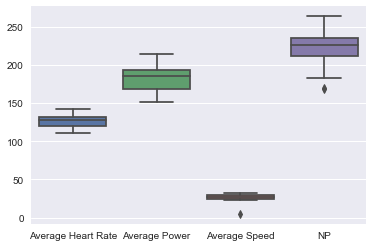

In [26]:
#make boxplot to compare 3 new dataframes
stats_workout = workout[['Average Heart Rate','Average Power','Average Speed','NP']]
 
sns.boxplot(data=stats_workout)

<AxesSubplot:>

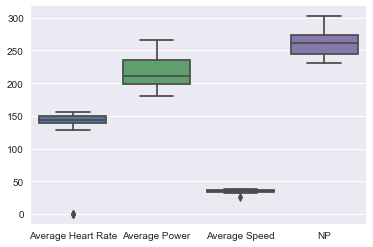

In [27]:
#make boxplot to compare 3 new dataframes
stats_race = race[['Average Heart Rate','Average Power','Average Speed','NP']]
 
sns.boxplot(data=stats_race)

<h1>#make boxplot to compare 3 new dataframes</h1>
<h2>there are three different boxplot for 'Ride', 'Workout', 'Race'</h2>
<h2>
In the boxplot from Ride to Race we can see that the mean of all 4 sections goes up.</h2>
<h2> so I can find out the same result from the scatterplot,histogram</h2>

In [28]:
#get the dataframe from weather_data_2018.csv file
weather18 = pd.read_csv('data/weather_data_2018.csv')
weather18

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66212,2018,1,1,30.9,1.0,Y
1,IDCJAC0010,66212,2018,1,2,28.8,1.0,Y
2,IDCJAC0010,66212,2018,1,3,25.3,1.0,Y
3,IDCJAC0010,66212,2018,1,4,25.4,1.0,Y
4,IDCJAC0010,66212,2018,1,5,28.9,1.0,Y
...,...,...,...,...,...,...,...,...
360,IDCJAC0010,66212,2018,12,27,33.8,1.0,Y
361,IDCJAC0010,66212,2018,12,28,35.3,1.0,Y
362,IDCJAC0010,66212,2018,12,29,35.9,1.0,Y
363,IDCJAC0010,66212,2018,12,30,36.4,1.0,Y


In [29]:
#get the dataframe from weather_data_2019.csv file
weather19=pd.read_csv('data/weather_data_2019.csv')
weather19

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66212,2019,1,1,34.0,1.0,Y
1,IDCJAC0010,66212,2019,1,2,30.6,1.0,Y
2,IDCJAC0010,66212,2019,1,3,28.9,1.0,Y
3,IDCJAC0010,66212,2019,1,4,33.7,1.0,Y
4,IDCJAC0010,66212,2019,1,5,39.3,1.0,Y
...,...,...,...,...,...,...,...,...
360,IDCJAC0010,66212,2019,12,27,30.1,1.0,Y
361,IDCJAC0010,66212,2019,12,28,33.8,1.0,Y
362,IDCJAC0010,66212,2019,12,29,30.7,1.0,Y
363,IDCJAC0010,66212,2019,12,30,33.2,1.0,Y


<h1>#get the dataframe from weather_data_2019.csv,weather_data_2018.csv  file</h1>

In [30]:
#make two dataframes into one
everyWeather = pd.concat([weather18, weather19])[['Year','Month','Day','Maximum temperature (Degree C)']]
everyWeather.Month=everyWeather.Month.apply(lambda x : "0"+str(x) if x<10 else x )
everyWeather.Day=everyWeather.Day.apply(lambda x : "0"+str(x) if x<10 else x )
everyWeather['day_f']=everyWeather.apply(lambda row: str(row.Year)+str(row.Month)+str(row.Day), axis=1)
del everyWeather['Year']
del everyWeather['Month']
del everyWeather['Day']
everyWeather

,Maximum temperature (Degree C),day_f
0,30.9,20180101
1,28.8,20180102
2,25.3,20180103
3,25.4,20180104
4,28.9,20180105
...,...,...
360,30.1,20191227
361,33.8,20191228
362,30.7,20191229
363,33.2,20191230


<h1>#make two dataframes into one and get rid of useless columns</h1>
<h2>through the lambda functions make one digit months,days (number) into two digit String</h2>
<h2>e.g. 1 -> 01  7 -> 07</h2>
<h2>make a num column 'day_f' to compare and merge with 'everyRide' datafram </h2>
<h2>delete the 'Year','Month','Day' columns (because that is useless now)</h2>

In [31]:
#make new column('day_f') to the dataframe 'everyRide'
everyRide.date
year=everyRide.date.apply(lambda x : int(x.split('/')[-1])+2000)
day=everyRide.date.apply(lambda x : x.split('/')[1])
month=everyRide.date.apply(lambda x : x.split('/')[0])
everyRide['Year']=year
everyRide['Month']=month
everyRide['Day']=day
everyRide['day_f']=everyRide.apply(lambda row: str(row.Year)+str(row.Month)+str(row.Day), axis=1)
everyRide

<ipython-input-31-b5326175d238>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everyRide['Year']=year
<ipython-input-31-b5326175d238>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everyRide['Month']=month
<ipython-input-31-b5326175d238>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS,Year,Month,Day,day_f
date,,,,,,,,,,,,,,,,,,,,,
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,222.856,0.831550,20.2257,2018,01,28,20180128
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,245.365,0.915540,94.5787,2018,01,28,20180128
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,253.702,0.946650,98.3269,2018,02,06,20180206
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,232.644,0.868080,171.0780,2018,02,07,20180207
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,212.726,0.793750,147.7970,2018,02,10,20180210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,222.988,0.832045,159.3630,2019,07,20,20190720
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,236.028,0.880701,183.1140,2019,07,27,20190727
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,212.020,0.791118,51.1646,2019,07,28,20190728


<h1>#make new column('day_f') to the dataframe 'everyRide'</h1>
<h2>extract year,month,day from the everyRide.date and make it as new column 'day_f</h2>

In [32]:
#merge two dataframes
result=pd.merge(everyRide,everyWeather, on='day_f')
result

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest HF,HRV Recovery Points,NP,IF,TSS,Year,Month,Day,day_f,Maximum temperature (Degree C)
0,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,222.856,0.831550,20.2257,2018,01,28,20180128,30.7
1,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,245.365,0.915540,94.5787,2018,01,28,20180128,30.7
2,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,253.702,0.946650,98.3269,2018,02,06,20180206,28.2
3,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,232.644,0.868080,171.0780,2018,02,07,20180207,28.1
4,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,212.726,0.793750,147.7970,2018,02,10,20180210,30.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,222.988,0.832045,159.3630,2019,07,20,20190720,20.6
201,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,236.028,0.880701,183.1140,2019,07,27,20190727,20.3
202,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,212.020,0.791118,51.1646,2019,07,28,20190728,19.3
203,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,267.699,0.998877,83.5620,2019,07,28,20190728,19.3


<h1>#merge two dataframes</h1>
<h2>merge two dataframes using on='day_f'</h2>

In [33]:
#make a new dataframe for correlation plots and tables
new_result=result[['Maximum temperature (Degree C)','distance','Average Speed','Average Power']]
new_result

,Maximum temperature (Degree C),distance,Average Speed,Average Power
0,30.7,7.6,26.0234,153.283
1,30.7,38.6,34.4380,186.599
2,28.2,24.3,22.2417,163.264
3,28.1,47.1,20.7841,148.253
4,30.3,59.8,25.6585,143.918
...,...,...,...,...
200,20.6,58.2,25.4524,164.740
201,20.3,59.6,25.5036,163.695
202,19.3,19.8,24.3316,162.109
203,19.3,29.1,34.8044,235.153


<h1>#make a new dataframe for correlation plots and tables</h1>

In [34]:
#correlation table
new_result.corr()

,Maximum temperature (Degree C),distance,Average Speed,Average Power
Maximum temperature (Degree C),1.000000,0.022040,-0.046882,-0.146100
distance,0.022040,1.000000,0.110461,0.030508
Average Speed,-0.046882,0.110461,1.000000,0.738740
Average Power,-0.146100,0.030508,0.738740,1.000000


[Text(0.5, 0, 'Maximum temperature (Degree C)'),
 Text(1.5, 0, 'distance'),
 Text(2.5, 0, 'Average Speed'),
 Text(3.5, 0, 'Average Power')]

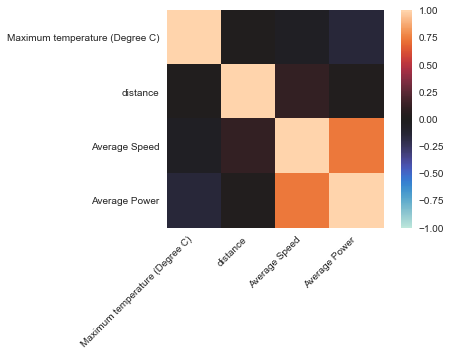

In [35]:
#correlation heatmap
corr2=new_result.corr()
av = sns.heatmap(corr2, 
                 vmin = -1,
                 vmax=1,
                 center=0,
                 square=True)
av.set_xticklabels(av.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

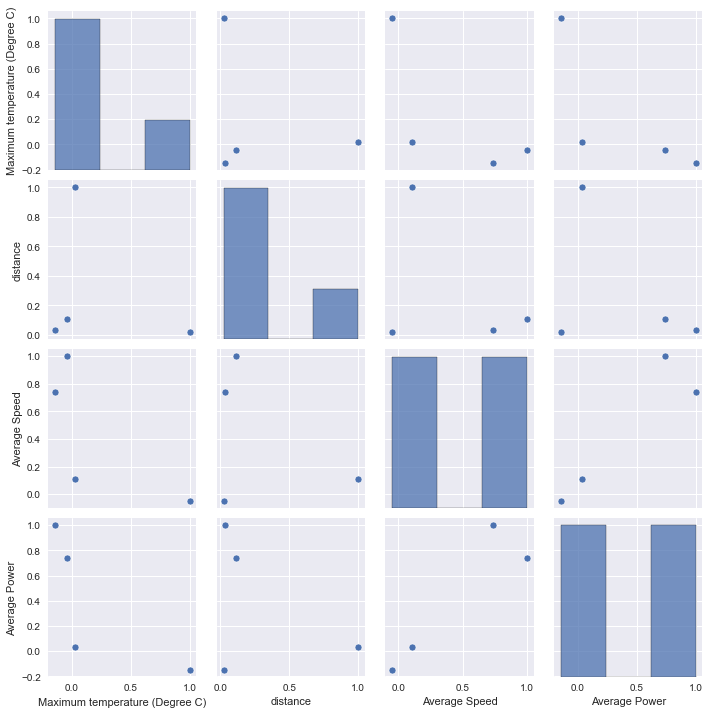

In [36]:
#correlation pairplot
g = sns.pairplot(corr2)

<h1>#make correlation table, heatmap, pairplot</h1>
<h2>make these table, plot,map to find out the relationship between temperature-distance, temperature-average_speed, temperature-average_power</h2>
<h2>relationship between distance travelled per ride and the temperature:</h2>
<h2>temperature and distance have really low(not strong:0.015475) positive relation between them</h2>
<h2>relatioship between Average speed of ride and the temperature:</h2>
<h2>temperature and average speed have negative relation(-0.062686) between them</h2>
<h2>and there is negative relation between temperature and average power(-0.079952)</h2>
<h2></h2>


<br></br>
<h1>Further Study 1</h1>

In [37]:

kudosRide=everyRide[['kudos','distance','Time Moving','Average Speed','Average Heart Rate','Average Power','NP','TSS','Elevation Gain']]
kudosRide


,kudos,distance,Time Moving,Average Speed,Average Heart Rate,Average Power,NP,TSS,Elevation Gain
date,,,,,,,,,
2018-01-27 19:39:49+00:00,4,7.6,1053,26.0234,120.539,153.283,222.856,20.2257,77.80
2018-01-27 20:01:32+00:00,19,38.6,4062,34.4380,146.541,186.599,245.365,94.5787,362.20
2018-02-05 21:06:42+00:00,6,24.3,3945,22.2417,119.178,163.264,253.702,98.3269,355.80
2018-02-07 06:59:05+00:00,10,47.1,8159,20.7841,124.936,148.253,232.644,171.0780,815.40
2018-02-09 19:18:03+00:00,22,59.8,8415,25.6585,122.678,143.918,212.726,147.7970,513.20
...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,16,58.2,8229,25.4524,0.000,164.740,222.988,159.3630,500.40
2019-07-26 20:12:56+00:00,15,59.6,8410,25.5036,120.261,163.695,236.028,183.1140,482.63
2019-07-27 20:42:59+00:00,6,19.8,2931,24.3316,121.697,162.109,212.020,51.1646,157.88


<h2>make new table to find out what leads to more kudos?</h2>

In [38]:
kudosCorr=kudosRide.corr()
kudosCorr

,kudos,distance,Time Moving,Average Speed,Average Heart Rate,Average Power,NP,TSS,Elevation Gain
kudos,1.000000,0.752259,0.664849,0.394387,0.177590,0.239503,0.384543,0.694504,0.634021
distance,0.752259,1.000000,0.971838,0.110461,0.146208,0.030508,0.202935,0.920085,0.804821
Time Moving,0.664849,0.971838,1.000000,-0.102954,0.084424,-0.119603,0.092725,0.909882,0.828337
Average Speed,0.394387,0.110461,-0.102954,1.000000,0.366373,0.738740,0.507974,0.037499,-0.078419
Average Heart Rate,0.177590,0.146208,0.084424,0.366373,1.000000,0.406241,0.271764,0.147901,0.037649
Average Power,0.239503,0.030508,-0.119603,0.738740,0.406241,1.000000,0.761274,0.139968,-0.113476
NP,0.384543,0.202935,0.092725,0.507974,0.271764,0.761274,1.000000,0.425102,0.228622
TSS,0.694504,0.920085,0.909882,0.037499,0.147901,0.139968,0.425102,1.000000,0.830574
Elevation Gain,0.634021,0.804821,0.828337,-0.078419,0.037649,-0.113476,0.228622,0.830574,1.000000


<h2>kudos and the other features relationship</h2>
<h2>distance and kudos look like have the highest correlation : 0.752259</h2>

[Text(0.5, 0, 'kudos'),
 Text(1.5, 0, 'distance'),
 Text(2.5, 0, 'Time Moving'),
 Text(3.5, 0, 'Average Speed'),
 Text(4.5, 0, 'Average Heart Rate'),
 Text(5.5, 0, 'Average Power'),
 Text(6.5, 0, 'NP'),
 Text(7.5, 0, 'TSS'),
 Text(8.5, 0, 'Elevation Gain')]

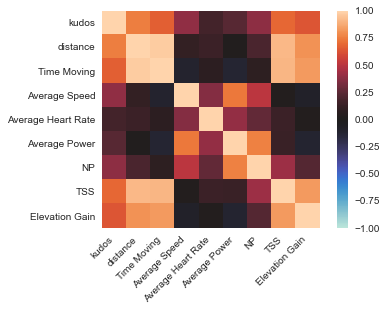

In [15]:
import seaborn as sns
ay = sns.heatmap(kudosCorr, 
                 vmin = -1,
                 vmax=1,
                 center=0,
                 square=True)
ay.set_xticklabels(ay.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

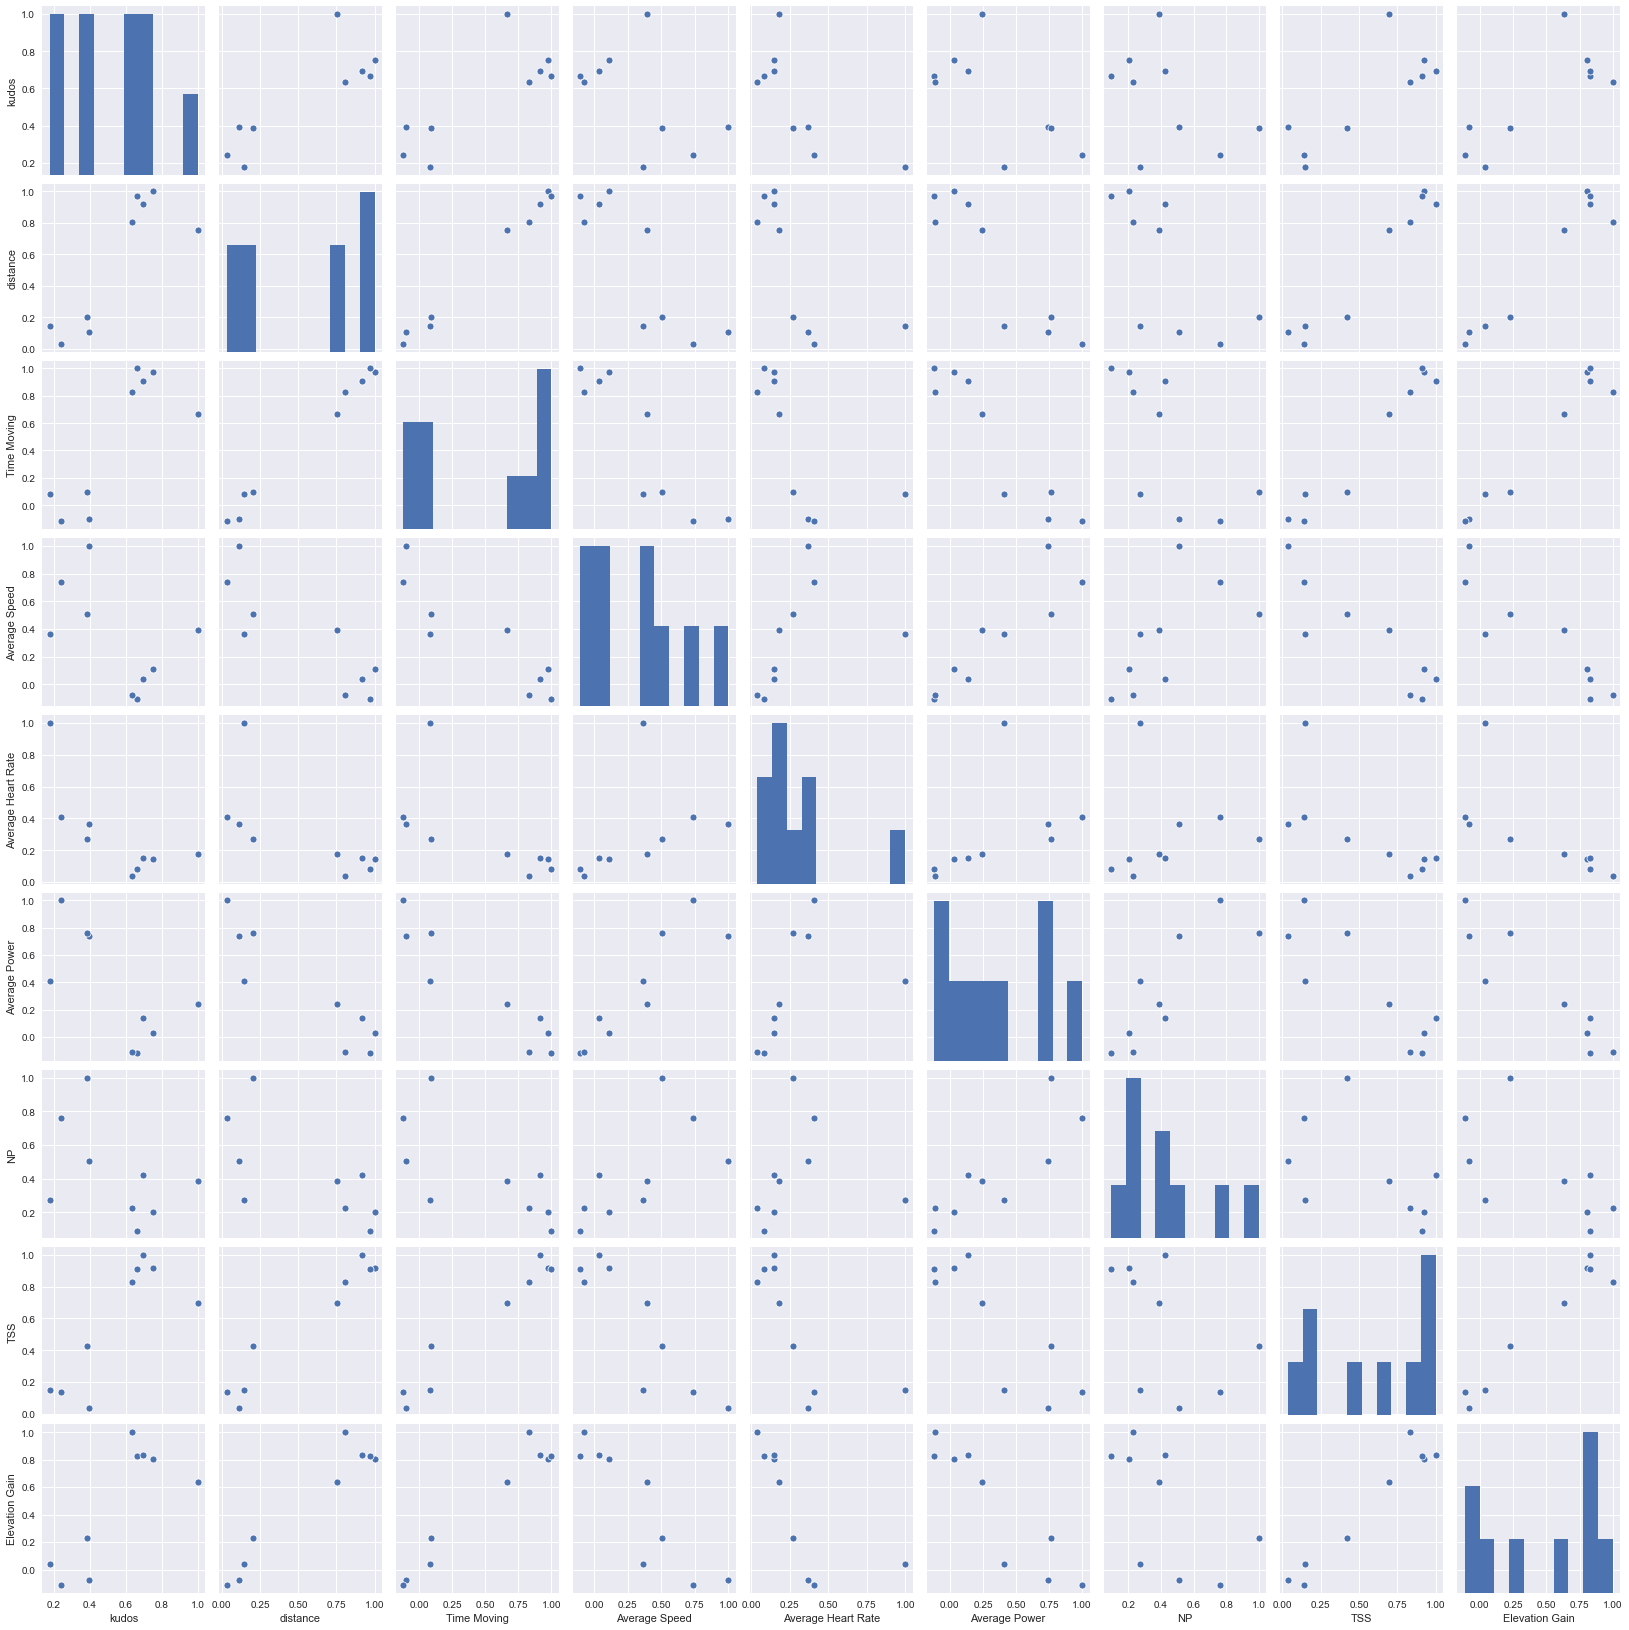

In [16]:
g = sns.pairplot(kudosCorr)

<h1>#</h1>
<h2>from the correlation table, heatmap, pairplot we can see the correltaionship between the variabels and kudos</h2>
<h2>there is significant positive relationship between kudos and three variables (distance:0.7522589)(the moving:0.664849)(TSS:0.694504)(</h2>

<br></br>
<h1>Further Study 2</h1>

In [15]:
#Further Study 2
len(everyRide.Day)

205

In [109]:
speed18=[0,0,0,0,0,0,0,0,0,0,0,0]
speed19=[0,0,0,0,0,0,0,0,0,0,0,0]
count18=[0,0,0,0,0,0,0,0,0,0,0,0]
count19=[0,0,0,0,0,0,0,0,0,0,0,0]

<h2>make 4 list to get the average of the Average Speed(speed18,speed19,count18,count19)</h2>

In [110]:
#2
#literate 
for x in range(len(everyRide.Month)):
    if everyRide.Year[x]==2018:
        if everyRide.Month[x]=="01":
            speed18[0]+=everyRide['Average Speed'][x]
            count18[0]+=1
        elif everyRide.Month[x]=="02":
            speed18[1]+=everyRide['Average Speed'][x]
            count18[1]+=1
        elif everyRide.Month[x]=="03":
            speed18[2]+=everyRide['Average Speed'][x] 
            count18[2]+=1
        elif everyRide.Month[x]=="04":
            speed18[3]+=everyRide['Average Speed'][x]
            count18[3]+=1
        elif everyRide.Month[x]=="05":
            speed18[4]+=everyRide['Average Speed'][x]
            count18[4]+=1
        elif everyRide.Month[x]=="06":
            speed18[5]+=everyRide['Average Speed'][x]
            count18[5]+=1
        elif everyRide.Month[x]=="07":
            speed18[6]+=everyRide['Average Speed'][x]
            count18[6]+=1
        elif everyRide.Month[x]=="08":
            speed18[7]+=everyRide['Average Speed'][x]
            count18[7]+=1
        elif everyRide.Month[x]=="09":
            speed18[8]+=everyRide['Average Speed'][x]
            count18[8]+=1
        elif everyRide.Month[x]=="10":
            speed18[9]+=everyRide['Average Speed'][x]
            count18[9]+=1
        elif everyRide.Month[x]=="11":
            speed18[10]+=everyRide['Average Speed'][x]
            count18[10]+=1
        else :
            speed18[11]+=everyRide['Average Speed'][x]
            count18[11]+=1
    else:
        if everyRide.Month[x]=="01":
            speed19[0]+=everyRide['Average Speed'][x]
            count19[0]+=1
        elif everyRide.Month[x]=="02":
            speed19[1]+=everyRide['Average Speed'][x]
            count19[1]+=1
        elif everyRide.Month[x]=="03":
            speed19[2]+=everyRide['Average Speed'][x] 
            count19[2]+=1
        elif everyRide.Month[x]=="04":
            speed19[3]+=everyRide['Average Speed'][x]
            count19[3]+=1
        elif everyRide.Month[x]=="05":
            speed19[4]+=everyRide['Average Speed'][x]
            count19[4]+=1
        elif everyRide.Month[x]=="06":
            speed19[5]+=everyRide['Average Speed'][x]
            count19[5]+=1
        elif everyRide.Month[x]=="07":
            speed19[6]+=everyRide['Average Speed'][x]
            count19[6]+=1
        elif everyRide.Month[x]=="08":
            speed19[7]+=everyRide['Average Speed'][x]
            count19[7]+=1
        elif everyRide.Month[x]=="09":
            speed19[8]+=everyRide['Average Speed'][x]
            count19[8]+=1
        elif everyRide.Month[x]=="10":
            speed19[9]+=everyRide['Average Speed'][x]
            count19[9]+=1
        elif everyRide.Month[x]=="11":
            speed19[10]+=everyRide['Average Speed'][x]
            count19[10]+=1
        else :
            speed19[11]+=everyRide['Average Speed'][x]
            count19[11]+=1

In [111]:
#2
listCount=count18+count19
listCount

[2,
 11,
 12,
 12,
 7,
 5,
 3,
 3,
 4,
 12,
 20,
 13,
 11,
 15,
 13,
 18,
 16,
 17,
 11,
 0,
 0,
 0,
 0,
 0]

<h1>Further Study2(1) - average speed</h1>
<h2>through the countlist we can figure out there are no data between 2019/08 ~ 2019/09. so now we will cut off the useless data from the list</h2>

In [112]:
#2
listCount=count18+count19[:-5]
listCount

[2, 11, 12, 12, 7, 5, 3, 3, 4, 12, 20, 13, 11, 15, 13, 18, 16, 17, 11]

In [113]:
#2
listSpeed=speed18+speed19[:-5]
listSpeed

[60.4614,
 265.1431,
 301.54730000000006,
 275.6919,
 171.63049999999998,
 135.1855,
 70.5368,
 75.4022,
 105.7405,
 304.8236,
 502.8605,
 343.4133,
 260.4869,
 393.7131999999999,
 351.07189999999997,
 475.7122999999999,
 429.88899999999995,
 454.5160000000001,
 292.2194]

In [114]:
#2
for i in range(len(listCount)):
    try:
        listSpeed[i]=listSpeed[i]/listCount[i]
    except ZeroDivisionError:
        listSpeed[i]=0
listSpeed

[30.2307,
 24.103918181818184,
 25.128941666666673,
 22.974324999999997,
 24.518642857142854,
 27.0371,
 23.512266666666665,
 25.134066666666666,
 26.435125,
 25.401966666666667,
 25.143025,
 26.416407692307693,
 23.68062727272727,
 26.24754666666666,
 27.005530769230766,
 26.428461111111105,
 26.868062499999997,
 26.73623529411765,
 26.5654]

<h1>Further Study2(1) - average speed</h1>
<h2>divide all of the speed list with the countlist to get the average </h2>

In [115]:
#2
list18D=[0,0,0,0,0,0,0,0,0,0,0,0]
print(list18)
list19D=[0,0,0,0,0,0,0,0,0,0,0,0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [116]:
for x in range(len(everyRide.Month)):
    if everyRide.Year[x]==2018:
        if everyRide.Month[x]=="01":
            list18D[0]+=everyRide.distance[x]
        elif everyRide.Month[x]=="02":
            list18D[1]+=everyRide.distance[x]
        elif everyRide.Month[x]=="03":
            list18D[2]+=everyRide.distance[x] 
        elif everyRide.Month[x]=="04":
            list18D[3]+=everyRide.distance[x]
        elif everyRide.Month[x]=="05":
            list18D[4]+=everyRide.distance[x]
        elif everyRide.Month[x]=="06":
            list18D[5]+=everyRide.distance[x]
        elif everyRide.Month[x]=="07":
            list18D[6]+=everyRide.distance[x]
        elif everyRide.Month[x]=="08":
            list18D[7]+=everyRide.distance[x]
        elif everyRide.Month[x]=="09":
            list18D[8]+=everyRide.distance[x]
        elif everyRide.Month[x]=="10":
            list18D[9]+=everyRide.distance[x]
        elif everyRide.Month[x]=="11":
            list18D[10]+=everyRide.distance[x]
        else :
            list18D[11]+=everyRide.distance[x]
    else:
        if everyRide.Month[x]=="01":
            list19D[0]+=everyRide.distance[x]
        elif everyRide.Month[x]=="02":
            list19D[1]+=everyRide.distance[x]
        elif everyRide.Month[x]=="03":
            list19D[2]+=everyRide.distance[x] 
        elif everyRide.Month[x]=="04":
            list19D[3]+=everyRide.distance[x]
        elif everyRide.Month[x]=="05":
            list19D[4]+=everyRide.distance[x]
        elif everyRide.Month[x]=="06":
            list19D[5]+=everyRide.distance[x]
        elif everyRide.Month[x]=="07":
            list19D[6]+=everyRide.distance[x]
        elif everyRide.Month[x]=="08":
            list19D[7]+=everyRide.distance[x]
        elif everyRide.Month[x]=="09":
            list19D[8]+=everyRide.distance[x]
        elif everyRide.Month[x]=="10":
            list19D[9]+=everyRide.distance[x]
        elif everyRide.Month[x]=="11":
            list19D[10]+=everyRide.distance[x]
        else :
            list19D[11]+=everyRide.distance[x]

In [117]:
listD=list18D+list19D[:-5]
listD

[46.2,
 360.90000000000003,
 468.0,
 450.19999999999993,
 273.3,
 193.4,
 180.7,
 125.1,
 184.8,
 417.4,
 671.9,
 523.1,
 374.4,
 482.40000000000003,
 488.09999999999997,
 591.3000000000002,
 566.6,
 516.5,
 367.20000000000005]

In [118]:
Tss18=[0,0,0,0,0,0,0,0,0,0,0,0]
Tss19=[0,0,0,0,0,0,0,0,0,0,0,0]

In [119]:
for x in range(len(everyRide.Month)):
    if everyRide.Year[x]==2018:
        if everyRide.Month[x]=="01":
            Tss18[0]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="02":
            Tss18[1]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="03":
            Tss18[2]+=everyRide.TSS[x] 
        elif everyRide.Month[x]=="04":
            Tss18[3]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="05":
            Tss18[4]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="06":
            Tss18[5]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="07":
            Tss18[6]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="08":
            Tss18[7]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="09":
            Tss18[8]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="10":
            Tss18[9]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="11":
            Tss18[10]+=everyRide.TSS[x]
        else :
            Tss18[11]+=everyRide.TSS[x]
    else:
        if everyRide.Month[x]=="01":
            Tss19[0]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="02":
            Tss19[1]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="03":
            Tss19[2]+=everyRide.TSS[x] 
        elif everyRide.Month[x]=="04":
            Tss19[3]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="05":
            Tss19[4]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="06":
            Tss19[5]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="07":
            Tss19[6]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="08":
            Tss19[7]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="09":
            Tss19[8]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="10":
            Tss19[9]+=everyRide.TSS[x]
        elif everyRide.Month[x]=="11":
            Tss19[10]+=everyRide.TSS[x]
        else :
            Tss19[11]+=everyRide.TSS[x]

In [120]:
listTss=Tss18+Tss19[:-5]
listTss

[114.8044,
 1087.2924000000003,
 1381.0867000000003,
 1324.5363,
 718.8654,
 586.4857999999999,
 381.432,
 370.5251,
 627.2076999999999,
 1023.1827,
 1793.3806,
 1498.1566,
 1057.9363,
 1269.9272,
 1611.9747999999997,
 1609.1064000000001,
 1591.1052000000002,
 1467.1177999999998,
 1096.1419]

<h1>Further Study2(1) </h1>
<h2>same process for 'TSS' and 'distance'</h2>

In [121]:
#2(2)
month=['2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07']

newdadada=pd.DataFrame(index=month)
newdadada['distance']=listD
newdadada['TSS']=listTss
newdadada['Average Speed']=listSpeed
newdadada['month']=month

newdadada

,distance,TSS,Average Speed,month
2018-01,46.2,114.8044,30.230700,2018-01
2018-02,360.9,1087.2924,24.103918,2018-02
2018-03,468.0,1381.0867,25.128942,2018-03
2018-04,450.2,1324.5363,22.974325,2018-04
2018-05,273.3,718.8654,24.518643,2018-05
2018-06,193.4,586.4858,27.037100,2018-06
2018-07,180.7,381.4320,23.512267,2018-07
2018-08,125.1,370.5251,25.134067,2018-08
2018-09,184.8,627.2077,26.435125,2018-09
2018-10,417.4,1023.1827,25.401967,2018-10


<h1>Further Study2(2) make new dataframe called newdadada which will help to generate a plot and summarise</h1>


<AxesSubplot:xlabel='month', ylabel='distance'>

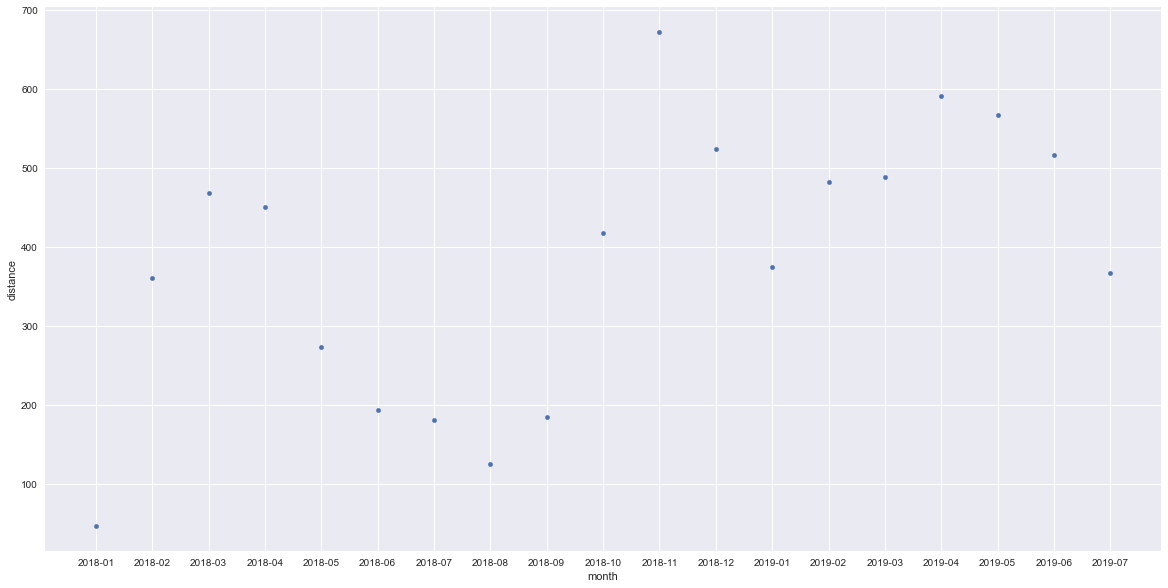

In [138]:
#2(3)
newdadada.plot(x ='month', y='distance', kind = 'scatter',figsize=(20, 10))

<AxesSubplot:xlabel='month', ylabel='Average Speed'>

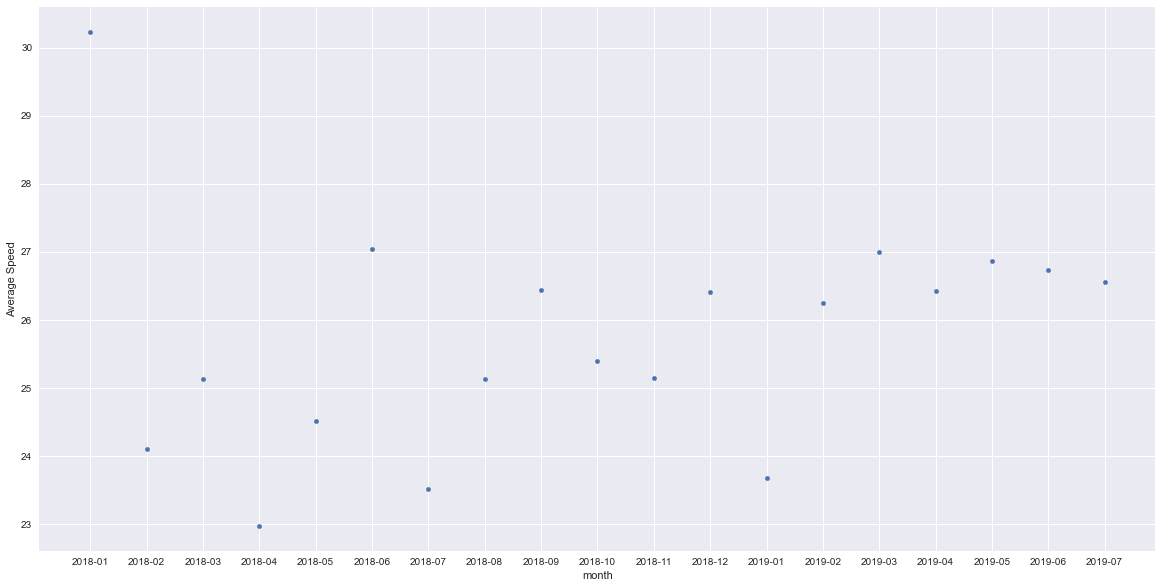

In [139]:
#2(3)
newdadada.plot(x ='month', y='Average Speed', kind = 'scatter',figsize=(20, 10))

<AxesSubplot:xlabel='month', ylabel='TSS'>

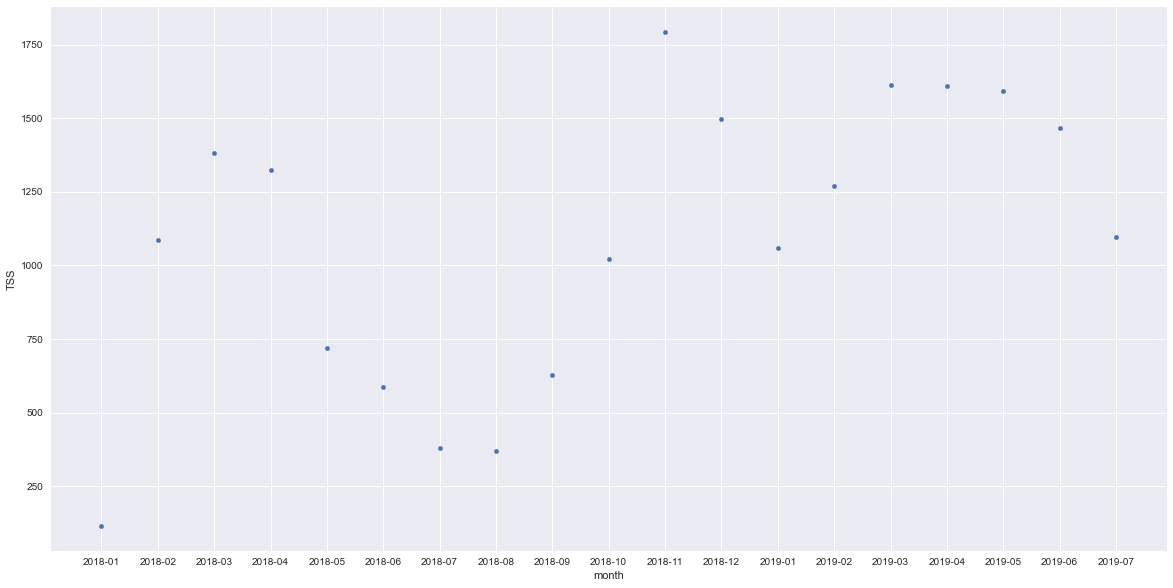

In [140]:
#2(3)
newdadada.plot(x ='month', y='TSS', kind = 'scatter',figsize=(20, 10))

<h1>Further Study2(2)</h1>
<h2>from the dataframe that we made scatterplot to see the distribution of TSS,average speed, distance by month(from 2018-01 to 2019-07) </h2>